In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mplpatches

In [13]:
gtfFile = '/private/groups/brookslab/gabai/projects/Add-seq/data/ref/sacCer3.gtf'
chrom_mean_mean_modScores= '/private/groups/brookslab/gabai/projects/Add-seq/data/chrom/modPredict/231014_PHO5_chrom_meanScore_meanPos_chrII:429000-435000modScores.tsv'
neg_mean_mean_modScores= '/private/groups/brookslab/gabai/projects/Add-seq/data/ctrl/modPredict/231014_PHO5_neg_meanScore_meanPos_chrII:429000-435000modScores.tsv'
pos_mean_mean_modScores= '/private/groups/brookslab/gabai/projects/Add-seq/data/ctrl/modPredict/231014_PHO5_pos_meanScore_meanPos_chrII:429000-435000modScores.tsv'

In [14]:
chromPlot = 'chrII'
pStart = 429000
pEnd = 435000
startPlot = pStart
endPlot = pEnd

In [15]:
gtfReads = {}
gene = ''
count = 0

with open(gtfFile) as gtfFh:
    for line in gtfFh:
        if '##' in line:
            pass
        else:
            line = line.split('\t')
            chrom = str(line[0])
            start = int(line[3])
            end = int(line[4])
            feature = line[2]
            if chrom != chromPlot:
                pass
            else:
                if feature in ['exon', 'CDS']:
                    geneID = line[8].split(';')[0].split('gene_id "')[1].split('"')[0]
                    # New gene
                    if geneID != gene:
                    # Store the previous genecript
                        if gene in gtfReads:
                            minstart = min(gtfReads[gene]['starts'])
                            maxend = max(gtfReads[gene]['ends'])
                            if maxend <= startPlot:
                                 del gtfReads[gene]
                            elif minstart >= endPlot:
                                 del gtfReads[gene]
                            else:
                                gtfReads[gene]['start'] = minstart
                                gtfReads[gene]['end'] = maxend
                                # print(gtfReads[gene]['start'])
                                count +=1
                                # print(count)
                        gene = geneID
                        gtfReads[gene] = {'starts': [start],'ends': [end]}
                        gtfReads[gene][feature] = ([start], [end])
                    else:
                        gtfReads[gene]['starts'].append(start)
                        gtfReads[gene]['ends'].append(end)
                        if feature in gtfReads[gene]:
                            gtfReads[gene][feature][0].append(start)
                            gtfReads[gene][feature][1].append(end)
                        else:
                            gtfReads[gene][feature] = ([start], [end])
    if gene in gtfReads:
        minstart = min(gtfReads[gene]['starts'])
        maxend = max(gtfReads[gene]['ends'])
        if maxend <= startPlot:
                del gtfReads[gene]
        elif minstart >= endPlot:
                del gtfReads[gene]
        else:
            gtfReads[gene]['start'] = minstart
            gtfReads[gene]['end'] = maxend

sorted_gtfReads = dict(sorted(gtfReads.items(), key = lambda x:x[1]['start']))

total read:  21
total read:  5
total read:  7


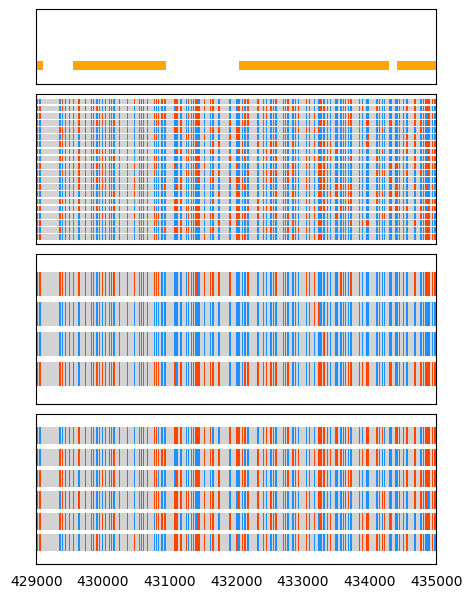

In [16]:

figureWidth=5
figureHeight=5
panelWidth=4
panelHeight=1.5

colorPalate = {'modT': 'orangered', 'modF':'dodgerblue', 'unMod': 'lightgrey'}
plt.figure(figsize=(figureWidth,figureHeight))
panel0 = plt.axes([0.1/figureWidth,4.9/figureHeight,panelWidth/figureWidth,(panelHeight/2)/figureHeight])
panel1 = plt.axes([0.1/figureWidth,3.3/figureHeight,panelWidth/figureWidth,panelHeight/figureHeight])
panel2 = plt.axes([0.1/figureWidth,1.7/figureHeight,panelWidth/figureWidth,panelHeight/figureHeight])
panel3 = plt.axes([0.1/figureWidth,0.1/figureHeight,panelWidth/figureWidth,panelHeight/figureHeight])

panel0.tick_params(bottom=False, labelbottom=False,
                   left=False, labelleft=False,
                   right=False, labelright=False,
                   top=False, labeltop=False)

panel1.tick_params(bottom=False, labelbottom=False,
                   left=False, labelleft=False,
                   right=False, labelright=False,
                   top=False, labeltop=False)
panel2.tick_params(bottom=False, labelbottom=False,
                   left=False, labelleft=False,
                   right=False, labelright=False,
                   top=False, labeltop=False)
panel3.tick_params(bottom=False, labelbottom=True,
                   left=False, labelleft=False,
                   right=False, labelright=False,
                   top=False, labeltop=False)


yRightMost = {}

for transID in sorted_gtfReads:
    y = 0
    start = sorted_gtfReads[transID]['start']
    end = sorted_gtfReads[transID]['end']
    while True:
        if y not in yRightMost:
            bottom = y
            yRightMost[y] = end
            break
        elif start >= yRightMost[y]:
            bottom = y
            yRightMost[y] = end
            break
        else:
            y +=1
    thinheight = 0.05
    line_width = 0
    rectangle = mplpatches.Rectangle([start, bottom-(thinheight/2)], end - start, thinheight,
                                    facecolor = 'grey',
                                    edgecolor = 'black',
                                    linewidth = line_width)
    panel0.add_patch(rectangle)
    if 'exon' in sorted_gtfReads[transID]:
        Height = 0.25
        blockStarts = np.array(sorted_gtfReads[transID]['exon'][0], dtype  = int)
        blockEnds = np.array(sorted_gtfReads[transID]['exon'][1], dtype = int)
        for index in range(len(blockStarts)):
            blockStart = blockStarts[index]
            blockEnd = blockEnds[index]
            rectangle = mplpatches.Rectangle([blockStart, bottom-(Height/2)], blockEnd-blockStart, Height,
                                facecolor = 'blue',
                                edgecolor = 'black',
                                linewidth = line_width)
            panel0.add_patch(rectangle)
    if 'CDS' in sorted_gtfReads[transID]:
        Height = 0.5
        blockStarts = np.array(sorted_gtfReads[transID]['CDS'][0], dtype = int)
        blockEnds = np.array(sorted_gtfReads[transID]['CDS'][1], dtype = int)
        for index in range(0, len(blockStarts), 1):
            blockStart = blockStarts[index]
            blockEnd = blockEnds[index]
            rectangle = mplpatches.Rectangle([blockStart, bottom-(Height/2)], blockEnd-blockStart, Height,
                                facecolor = 'orange',
                                edgecolor = 'black',
                                linewidth = line_width)
            panel0.add_patch(rectangle)

with open(chrom_mean_mean_modScores) as chrom_mean_mean_fh:
    bottom = 0
    height = 0.8
    line_width = 0
    for line in chrom_mean_mean_fh:
        lines = line.split('}')
        chrom_total_reads = len(lines)
        print('total read: ', len(lines))
        for read in lines:
            if read:
                read = read.split('\t')
                readScores = {}
                readname = read[0]
                chrom = read[1]
                modScores = read[4].split('{')[1].split(',')
                for i in modScores:
                    pos_score = i.split(':')
                    readScores[int(pos_score[0])] = float(pos_score[1])
                for pos in range(pStart,pEnd):
                    color = colorPalate['unMod']
                    if pos-pStart in readScores:
                        if readScores[pos-pStart] >= 0.5:
                            color = colorPalate['modT']
                        else:
                            color = colorPalate['modF']
                    rectangle = mplpatches.Rectangle([pos, bottom-(height/2)], pos+1, height,
                                                facecolor = color,
                                                edgecolor = 'grey',
                                                linewidth = line_width)
                    panel1.add_patch(rectangle)
                bottom +=1

with open(neg_mean_mean_modScores) as neg_mean_mean_fh:
    bottom = 0
    height = 0.8
    line_width = 0
    for line in neg_mean_mean_fh:
        lines = line.split('}')
        neg_total_reads = len(lines)
        print('total read: ', neg_total_reads)
        for read in lines:
            if read:
                read = read.split('\t')
                readScores = {}
                readname = read[0]
                chrom = read[1]
                modScores = read[4].split('{')[1].split(',')
                for i in modScores:
                    pos_score = i.split(':')
                    readScores[int(pos_score[0])] = float(pos_score[1])
                for pos in range(pStart,pEnd):
                    color = colorPalate['unMod']
                    if pos-pStart in readScores:
                        if readScores[pos-pStart] >= 0.5:
                            color = colorPalate['modT']
                        else:
                            color = colorPalate['modF']
                    rectangle = mplpatches.Rectangle([pos, bottom-(height/2)], pos+1, height,
                                                facecolor = color,
                                                edgecolor = 'grey',
                                                linewidth = line_width)
                    panel2.add_patch(rectangle)
                bottom +=1
    
with open(pos_mean_mean_modScores) as pos_mean_mean_fh:
    bottom = 0
    height = 0.8
    line_width = 0       
    for line in pos_mean_mean_fh:
        lines = line.split('}')
        pos_total_reads = len(lines)
        print('total read: ', pos_total_reads)
        for read in lines:
            if read:
                read = read.split('\t')
                readScores = {}
                readname = read[0]
                chrom = read[1]
                modScores = read[4].split('{')[1].split(',')
                for i in modScores:
                    pos_score = i.split(':')
                    readScores[int(pos_score[0])] = float(pos_score[1])
                for pos in range(pStart,pEnd):
                    color = colorPalate['unMod']
                    if pos-pStart in readScores:
                        if readScores[pos-pStart] >= 0.5:
                            color = colorPalate['modT']
                        else:
                            color = colorPalate['modF']
                    rectangle = mplpatches.Rectangle([pos, bottom-(height/2)], pos+1, height,
                                                facecolor = color,
                                                edgecolor = 'grey',
                                                linewidth = line_width)
                    panel3.add_patch(rectangle)
                bottom +=1

panel0.set_xlim(pStart, pEnd)
panel0.set_ylim(-1,3)

panel1.set_xlim(pStart, pEnd)
panel1.set_ylim(-1,chrom_total_reads-1)

panel2.set_xlim(pStart, pEnd)
panel2.set_ylim(-1,neg_total_reads-1)

panel3.set_xlim(pStart, pEnd)
panel3.set_ylim(-1,pos_total_reads-1)

outFile = '/private/groups/brookslab/gabai/projects/Add-seq/results/figures/231014_PHO5_meanScore_meanPos_chrII:429000-435000modScores.pdf'
plt.savefig(outFile,dpi=2000)